In [95]:
import pandas as pd
train = pd.read_csv('/content/train.csv')

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
train.isnull().sum().sort_values(ascending= False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


From the above table we can observe that major portion of the cabin feature(687/891 = 77%) is missing. So we can remove that feature. We can remove the 2 datap points in which Embarked feature is missing. We can impute the missing values of Age with either mean or median ( Based on the accuracy obtained )

In [99]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above table we can observe that only 38% of the people survived.The difference between 75th percentile and max value is very large. This may be due to the presence of an outlier. We can remove that for better analysis of data

Age       False  True 
Survived              
0           424    125
1           290     52
Age P Value: 0.007682742096212262


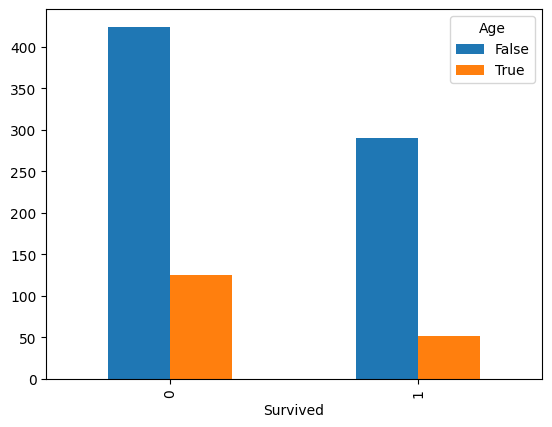

Cabin     False  True 
Survived              
0            68    481
1           136    206
Cabin P Value: 6.7419704360811776e-21


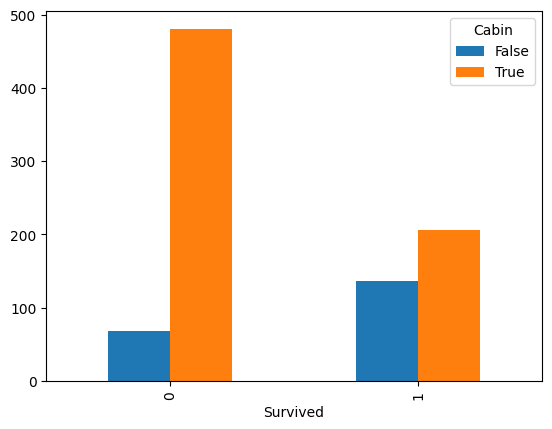

In [100]:
from scipy.stats import chi2_contingency,levene,kruskal
# Checking effects of features cobtaining NULL values on target
# Embarked has 2 NULL values which isn't a significant amount
missing_feat = ['Age','Cabin']

for col in missing_feat:
    contigency_table = pd.crosstab(train['Survived'],train[col].isnull())
    p_value = chi2_contingency(contigency_table)[1]
    print(contigency_table)
    print(col,'P Value:',p_value)

    contigency_table.plot.bar()
    plt.show()

We can observe that null values of Age and Cabin are strongly assosiated with survived.

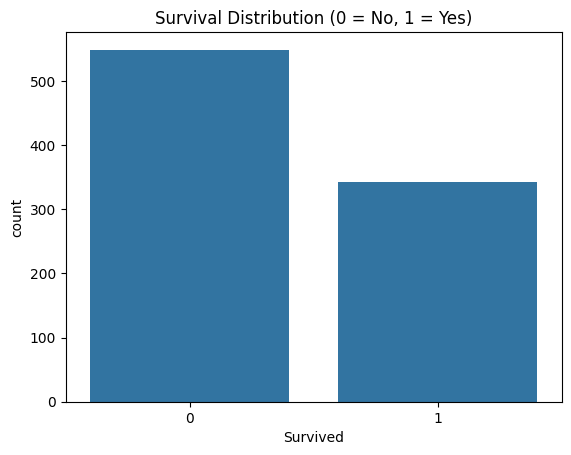

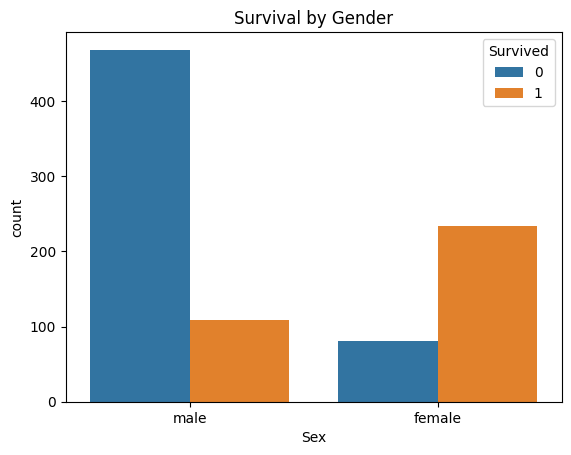

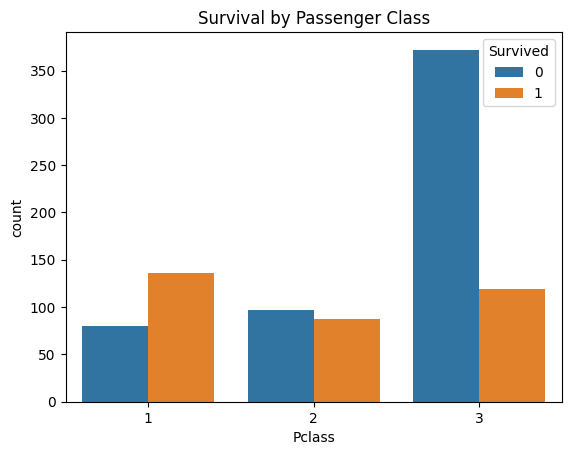

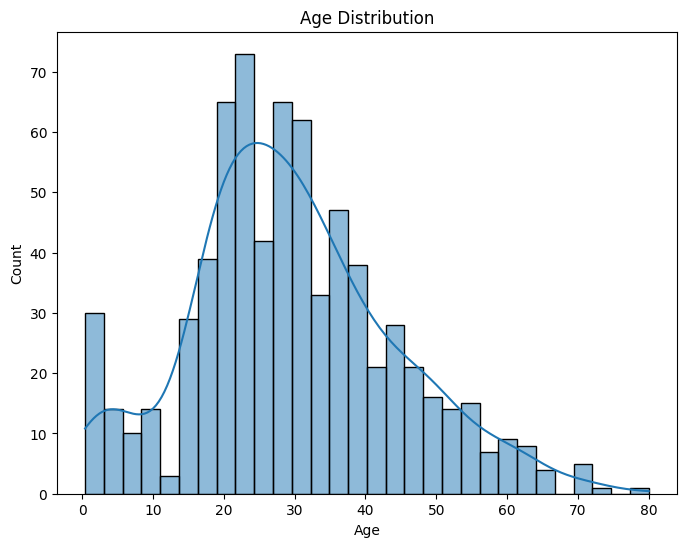

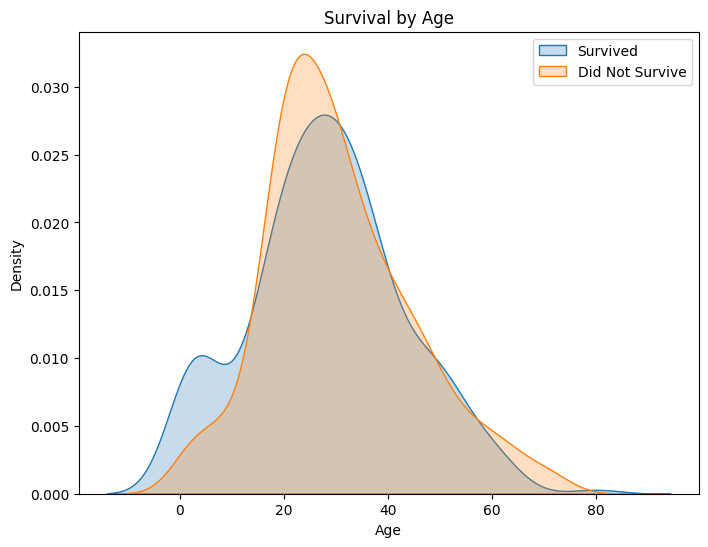

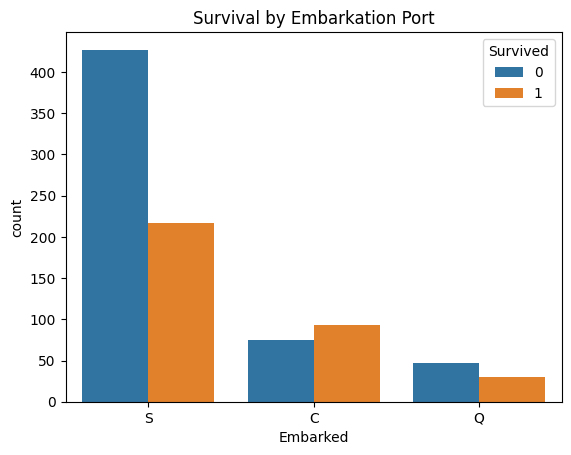

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Survival distribution
sns.countplot(x='Survived', data=train)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.show()

# 2. Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.show()

# 3. Survival by Passenger Class (Pclass)
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

# 4. Age Distribution of Passengers
plt.figure(figsize=(8, 6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# 5. Survival by Age
plt.figure(figsize=(8, 6))
sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)
plt.title('Survival by Age')
plt.legend()
plt.show()

# 6. Embarked vs Survival
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Survival by Embarkation Port')
plt.show()


From the above plots we can observe that women are much more likely to be survived than men. 74% of the women survived while only 18% of the men survived. We can look deeper into which category of women and men are survived

In [102]:
train.groupby(['Sex', 'Pclass']).mean(numeric_only = True)

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

Women in the first and second P class are more likely to survive than third class. Also men in the first class are nearly three times more likely to survive than the men in third class. From this we can understand that Pclass played key role for survival

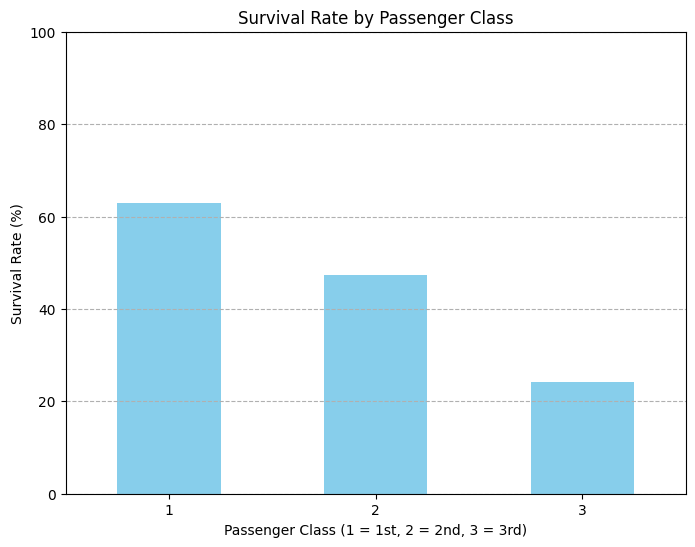

In [103]:
# Percentage of survivors by passenger class
survival_rate = train.groupby('Pclass')['Survived'].mean() * 100

# Bar plot for the survival percentage by passenger class
plt.figure(figsize=(8, 6))
survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--')
plt.show()


From this graph we can colclude that Pclass played an important role in survival - 63% of the 1st class passengers survived , 48% of the 2nd class passenger survived while only 24% of the 3rd class passengers survived

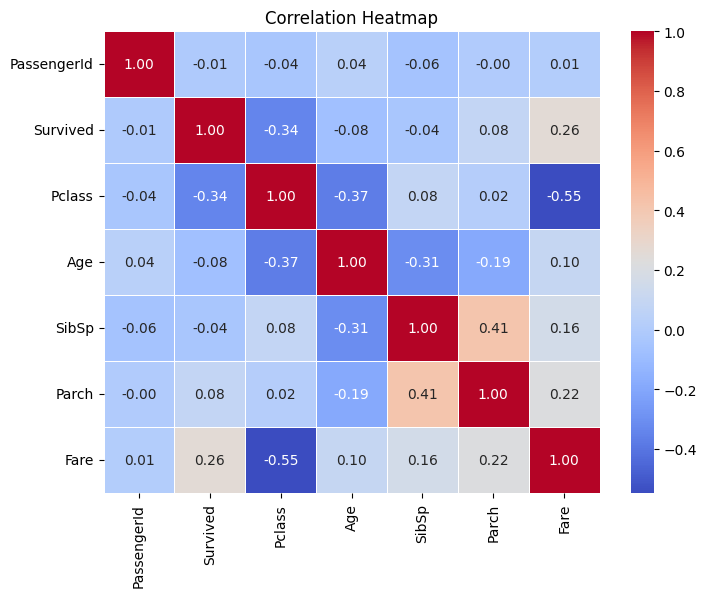

In [104]:
corr_matrix = train.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [105]:
test = pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [107]:
print(train[['Parch']].value_counts()/891*100)
print(train[['SibSp']].value_counts()/891*100)

Parch
0        76.094276
1        13.243547
2         8.978676
3         0.561167
5         0.561167
4         0.448934
6         0.112233
Name: count, dtype: float64
SibSp
0        68.237935
1        23.456790
2         3.142536
4         2.020202
3         1.795735
8         0.785634
5         0.561167
Name: count, dtype: float64


We can observe that Sibsp and Parch are  having many categories with frequency less than 5%, we will combined them in a single category

In [108]:
train['Parch'] = train['Parch'].replace({3:2,4:2,5:2,6:2})
train['SibSp'] = train['SibSp'].replace({3:2,4:2,5:2,8:2})

In [109]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# 1. Fill missing 'Age' with median value
age_imputer = SimpleImputer(strategy='median')
train['Age'] = age_imputer.fit_transform(train[['Age']])
test['Age'] = age_imputer.transform(test[['Age']])

# 2. Fill missing 'Embarked' with the most frequent value (mode)
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# 3. Fill missing 'Fare' in the test set with median value
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [110]:
# 1. Ensure all values in 'Embarked' and 'Sex' columns are strings
train['Embarked'] = train['Embarked'].astype(str)
test['Embarked'] = test['Embarked'].astype(str)

train['Sex'] = train['Sex'].astype(str)
test['Sex'] = test['Sex'].astype(str)

# 2. Combine train and test columns to fit the encoder consistently
combined_embarked = pd.concat([train['Embarked'], test['Embarked']], axis=0)

# 3. Fit LabelEncoder on the combined set
label_encoder = LabelEncoder()
label_encoder.fit(combined_embarked)

# 4. Transform 'Embarked' in both train and test sets
train['Embarked'] = label_encoder.transform(train['Embarked'])
test['Embarked'] = label_encoder.transform(test['Embarked'])

# 5. Repeat the same for the 'Sex' column
combined_sex = pd.concat([train['Sex'], test['Sex']], axis=0)
label_encoder.fit(combined_sex)

train['Sex'] = label_encoder.transform(train['Sex'])
test['Sex'] = label_encoder.transform(test['Sex'])


In [111]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [112]:
# Drop irrelevant columns: 'PassengerId', 'Name', 'Ticket', 'Cabin'
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [113]:
import numpy as np

# 1. Create a 'FamilySize' feature (SibSp + Parch + 1 for self)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# 2. Create a 'IsAlone' feature (1 if FamilySize == 1, else 0)
train['IsAlone'] = np.where(train['FamilySize'] == 1, 1, 0)
test['IsAlone'] = np.where(test['FamilySize'] == 1, 1, 0)

# 3. Create 'Age*Class' feature (combines Age and Pclass)
train['Age*Class'] = train['Age'] * train['Pclass']
test['Age*Class'] = test['Age'] * test['Pclass']

# 4. Create 'Fare*Class' feature (combines Fare and Pclass)
train['Fare*Class'] = train['Fare'] * train['Pclass']
test['Fare*Class'] = test['Fare'] * test['Pclass']

# Display the modified data
print("Training Data after Feature Engineering:")
print(train.head())
print("\nTest Data after Feature Engineering:")
print(test.head())


Training Data after Feature Engineering:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         0       3    1  22.0      1      0   7.2500         2           2   
1         1       1    0  38.0      1      0  71.2833         0           2   
2         1       3    0  26.0      0      0   7.9250         2           1   
3         1       1    0  35.0      1      0  53.1000         2           2   
4         0       3    1  35.0      0      0   8.0500         2           1   

   IsAlone  Age*Class  Fare*Class  
0        0       66.0     21.7500  
1        0       38.0     71.2833  
2        1       78.0     23.7750  
3        0       35.0     53.1000  
4        1      105.0     24.1500  

Test Data after Feature Engineering:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone  \
0       3    1  34.5      0      0   7.8292         1           1        1   
1       3    0  47.0      1      0   7.0000         2           2        0

In [114]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Split train data into features (X) and target (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# 2. Split train data into train and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score




# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[model_name] = cv_scores
    print(f"Accuracy Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}\n")

# Display summary of results
print("\nModel Comparison:")
for model_name, scores in results.items():
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}")


Training and evaluating: Logistic Regression
Accuracy Scores: [0.77094972 0.7752809  0.79213483 0.7752809  0.80898876]
Mean Accuracy: 0.7845

Training and evaluating: KNN
Accuracy Scores: [0.63128492 0.66853933 0.71348315 0.75280899 0.70224719]
Mean Accuracy: 0.6937

Training and evaluating: SVM
Accuracy Scores: [0.62011173 0.71910112 0.7247191  0.73595506 0.7752809 ]
Mean Accuracy: 0.7150

Training and evaluating: Random Forest
Accuracy Scores: [0.77653631 0.80337079 0.84831461 0.7752809  0.84831461]
Mean Accuracy: 0.8104

Training and evaluating: XGBoost
Accuracy Scores: [0.77653631 0.79213483 0.84831461 0.79775281 0.8258427 ]
Mean Accuracy: 0.8081


Model Comparison:
Logistic Regression: Mean Accuracy = 0.7845
KNN: Mean Accuracy = 0.6937
SVM: Mean Accuracy = 0.7150
Random Forest: Mean Accuracy = 0.8104
XGBoost: Mean Accuracy = 0.8081


From the above data we understood that XGBoost and Random FOrest Classifier are the top two performing models for the dataset. We can fine tune both the models to increase the accuracy if possible and we can also do ensemble methods with both the classifiers

In [121]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Fit Grid Search
grid_search.fit(X, y)

# Get the best parameters and score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("Best Parameters:", best_params_xgb)
print("Best Cross-Validation Accuracy:", best_score_xgb)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.8350511581193899


In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Set the hyperparameters and their values for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X, y)

# Get the best parameters and score
best_rf_model = grid_search.best_estimator_
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_score_rf:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8317


In [118]:
from sklearn.ensemble import VotingClassifier


rf = best_rf_model
xgb_best = XGBClassifier(**best_params_xgb)  # Use best parameters found from grid search

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb_best)
], voting='soft')  # 'soft' for using predicted probabilities

# Fit the Voting Classifier
voting_clf.fit(X, y)

# Evaluate the Voting Classifier with cross-validation
voting_cv_scores = cross_val_score(voting_clf, X, y, cv=5, scoring='accuracy')
print("Voting Classifier Mean Accuracy:", voting_cv_scores.mean())


Voting Classifier Mean Accuracy: 0.8361621994852803


Fine tuned XGBoost and RandomForest Classifier are giving slightly better accuracy compared to the voting classifier of top two best performing models. But we can go ahead with voting classifier which can make the classification diverse and may perform better in test set

<Figure size 1000x800 with 0 Axes>

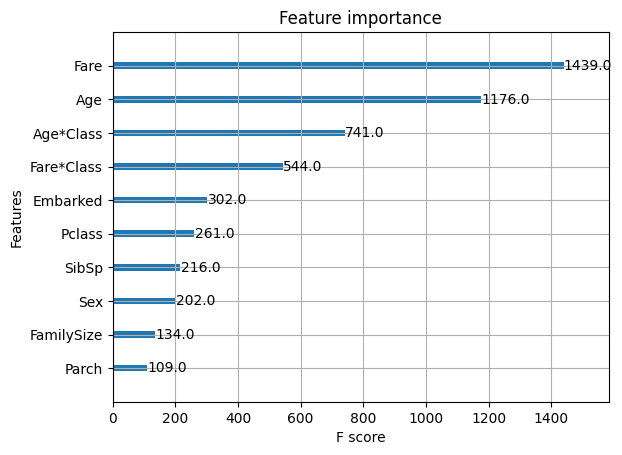

In [119]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

xgb_best.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_best, max_num_features=10)
plt.show()


In [120]:
test_data = pd.read_csv('/content/test.csv')

# Predict on the test dataset
test_predictions = voting_clf.predict(test)

# Save predictions in the required format for submission
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})

# Save to CSV for submission
output.to_csv('Predictions.csv', index=False)
print("Predictions saved to 'Predictions.csv'")


Predictions saved to 'Predictions.csv'
